# ПЕРВАЯ ЧАСТЬ

In [2]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

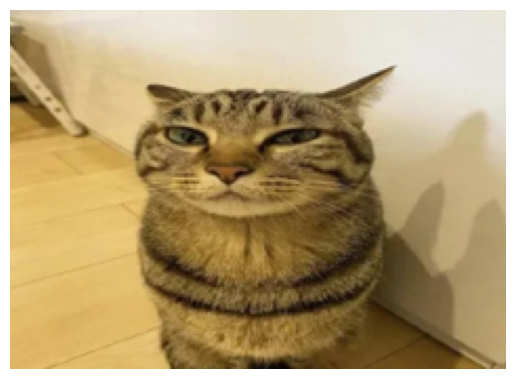

In [3]:
img = Image.open('cat.jpg')
w, h = img.size
img = img.resize((w//4, h//4))

x = np.array(img, dtype=np.float32) # преобразование из PIL в numpy array
#U, S, V = np.linalg.svd(X, full_matrices=False) # разложение SVD
# # обратное преобразование из numpy array в PIL с сохранение изображения на диск
# Image.fromarray(np.asarray(Y_r, dtype=np.uint8)).save(f'{r}.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [4]:
r = np.array(list([x[i][j][0] for j in range(x.shape[1])] for i in range(x.shape[0])))
g = np.array(list([x[i][j][1] for j in range(x.shape[1])] for i in range(x.shape[0])))
b = np.array(list([x[i][j][2] for j in range(x.shape[1])] for i in range(x.shape[0])))

In [5]:

U_r, S_r, V_r = np.linalg.svd(r, full_matrices=False)
U_g, S_g, V_g = np.linalg.svd(g, full_matrices=False)
U_b, S_b, V_b = np.linalg.svd(b, full_matrices=False)
print(U_r.shape, S_r.shape, V_r.shape)

def new_rang(u, s, v, rk=1):
  #s = np.diag(np.array([s[i] if i < rk else 0 for i in range(s.size)]))
  s = np.diag(s[:rk])
  u = u[:, :rk]
  v = v[:rk, :]
  m = u @ s @ v
  #return u, s, v
  return np.round(np.clip(m, a_min=0, a_max=255)).astype(np.uint8)


def nw(u1, s1, v1, u2, s2, v2, u3, s3, v3,  rk=1):
  a = new_rang(u1, s1, v1, rk)
  b = new_rang(u2, s2, v2, rk)
  c = new_rang(u3, s3, v3, rk)
  return np.stack((a, b, c), axis=-1)

(171, 171) (171,) (171, 236)


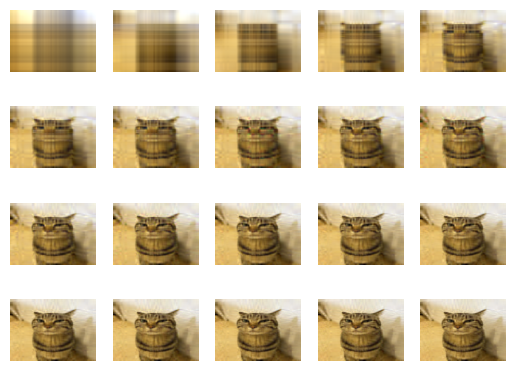

In [6]:
for i in range(1, 21):
  plt.subplot(4, 5, i)
  h = nw(U_r, S_r, V_r, U_g, S_g, V_g, U_b, S_b, V_b, i)
  plt.imshow(h)
  plt.axis('off')
plt.show()



---



# Вторая часть

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal

In [8]:
M = 200
sigma1 = 0.1
sigma2 = 0.5
x1 = np.random.randn(M, 1) * sigma1
x2 = np.random.randn(M, 1) * sigma2
X = np.concatenate((x1, x2), axis=1)
def r(a): return np.array([[np.cos(a), -np.sin(a)], [np.sin(a), np.cos(a)]])

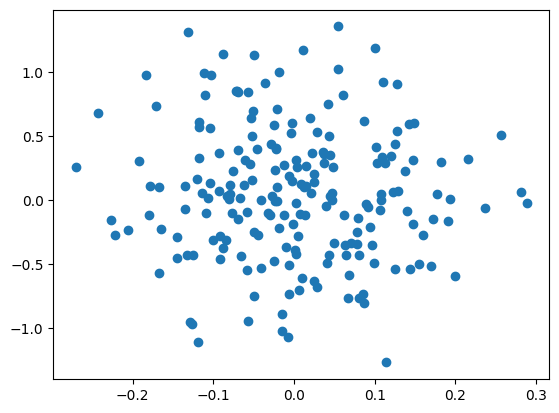

In [9]:
plt.scatter(x1, x2)
plt.show()

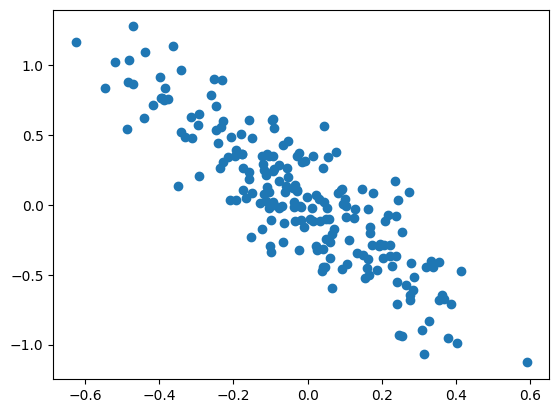

In [10]:
n = (r(np.pi / 8) @ X.T).T
plt.scatter(n[:,0], n[:,1])
plt.show()

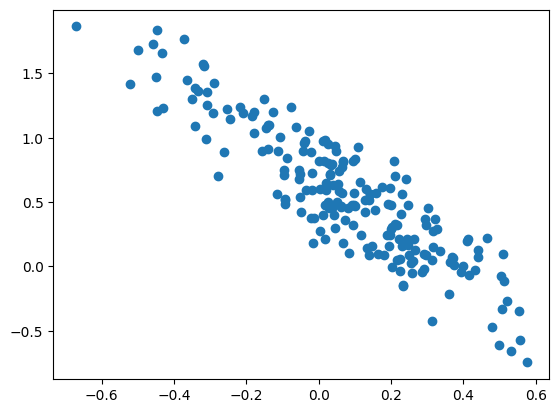

In [11]:
c = np.cov(n.T)
d = np.random.multivariate_normal([0.1, 0.5], c, 200)
plt.scatter(d[:,0], d[:,1])
plt.show()

---
### Задание 2



In [12]:
M = 200
sigma1 = 0.1
sigma2 = 0.5
x1 = np.random.randn(M, 1) * sigma1
x2 = np.random.randn(M, 1) * sigma2
X = np.concatenate((x1, x2), axis=1)

me = np.mean(x1), np.mean(x1)
c = np.cov(X.T)

<a list of 6 text.Text objects>

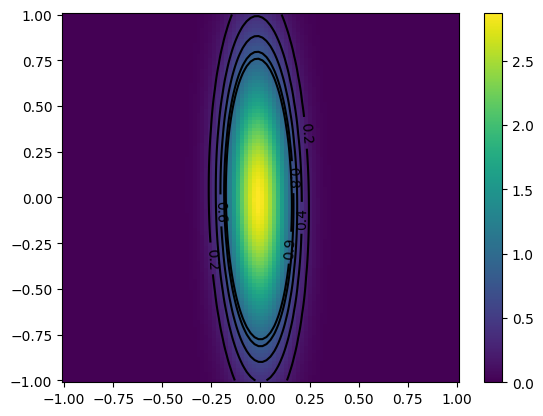

In [13]:
xx = np.linspace(-1, 1, 100)
yy = np.linspace(-1, 1, 100)
XX, YY = np.meshgrid(xx, yy)
pp = np.stack((XX.flatten(), YY.flatten()), axis=1)
m = multivariate_normal(mean=me, cov=c) #
ZZ = m.pdf(pp).reshape(XX.shape)

IMG = plt.pcolor(XX, YY, ZZ)
plt.colorbar(IMG)

CS = plt.contour(XX, YY, m.pdf(pp).reshape(XX.shape), levels=[0.2, 0.4, 0.6, 0.8, 0.9], colors='k')
plt.clabel(CS, inline=1, fontsize=10)



---



### Задание 3


In [14]:
M = 200
sigma1 = 0.2
sigma2 = 0.4
x1 = np.random.randn(M, 1) * sigma1
y1 = np.random.randn(M, 1) * sigma2
Y1 = np.concatenate((x1, x2), axis=1)
me1 = [np.mean(x1), np.mean(y1)]
c1 = np.cov(Y1.T)

x2 = np.random.randn(M, 1) * sigma1
y2 = np.random.randn(M, 1) * sigma2
Y2 = np.concatenate((x1, x2), axis=1)
me2 = [np.mean(x2), np.mean(y2)]
c2 = np.cov(Y2.T)

def met(x, y):
  return np.sqrt((x[0] - y[0])**2 + (y[1] - x[1])**2)

def mesto_tchk(x):
  if np.sqrt((me1[0] - x[0])**2 + (me1[1] - x[1])**2) < np.sqrt((me2[0] - x[0])**2 + (me2[1] - x[1])**2):
    return -1
  return 1

mesto_tchk((0.25, 0.3))

-1

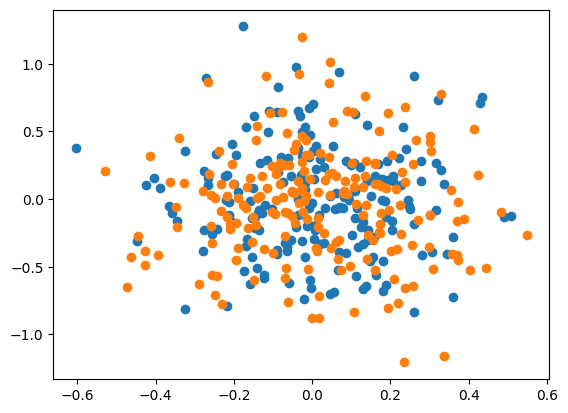

In [15]:
plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.show()

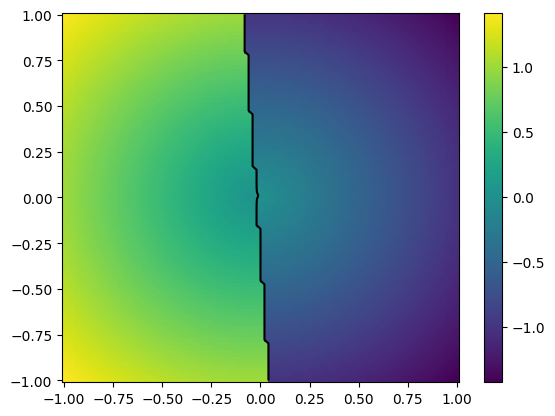

In [16]:
xx = np.linspace(-1, 1, 100)
yy = np.linspace(-1, 1, 100)
XX, YY = np.meshgrid(xx, yy)
pp = np.stack((XX.flatten(), YY.flatten()), axis=1)

ZZ = np.array([[mesto_tchk([i,j]) * met([i,j], me1) for j in yy] for i in xx]).reshape(XX.shape)

IMG = plt.pcolor(XX, YY, ZZ)
plt.colorbar(IMG)

CS = plt.contour(XX, YY, ZZ, levels=[0], colors='k')



---

### Задача 4


In [54]:
from sklearn.base import BaseEstimator
from math import sqrt

class myLDA(BaseEstimator):
    def __init__(self):
        self.k = 1
        self.b = 1

    def fit(self, x, y):
        Y1 = np.concatenate((x[0], x[1]), axis=1)
        self.me1 = [np.mean(x[0]), np.mean(x[1])]
        me1 = self.me1

        Y2 = np.concatenate((y[0], y[1]), axis=1)
        self.me2 = [np.mean(y[0]), np.mean(y[1])]
        me2 = self.me2

        self.b = [int((me1[0] + me2[0])/2), int((me1[1] + me2[1])/2)]
        self.k = (max(me1[0], me2[0]) - min(me1[0], me2[0]))/ (max(me1[1], me2[1]) - min(me1[1], me2[1]))


    def predict(self, X):
      r0 = []
      r1 = []
      for i in X:
        if self.k * i[0] + self.b[0] < i[1]:
          if me1[0] > me2[0]:
            r0.append(i)
          else:
            r1.append(i)
        else:
          if me1[0] > me2[0]:
            r1.append(i)
          else:
            r0.append(i)
      return r0, r1

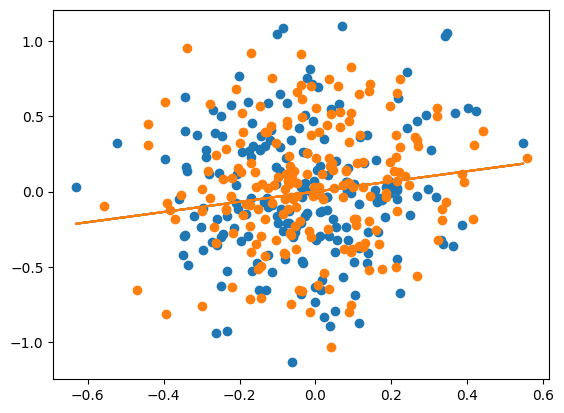

In [55]:
M = 200
sigma1 = 0.2
sigma2 = 0.4
x1 = np.random.randn(M, 1) * sigma1
y1 = np.random.randn(M, 1) * sigma2
Y1 = np.concatenate((x1, y2), axis=1)
me1 = [np.mean(x1), np.mean(y1)]
c1 = np.cov(Y1.T)

x2 = np.random.randn(M, 1) * sigma1
y2 = np.random.randn(M, 1) * sigma2
Y2 = np.concatenate((x2, y2), axis=1)
me2 = [np.mean(x2), np.mean(y2)]
c2 = np.cov(Y2.T)

lda = myLDA()
lda.fit((x1, y1), (x2, y2))

plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.plot(list(x1.T[0]), list(map(lambda x: lda.k*x + lda.b, list(x1.T[0]))))

plt.show()



---



## Задача 5


In [56]:
from sklearn.base import BaseEstimator

class myNB(BaseEstimator):
    def __init__(self):
        self.X=None
        self.Y=None
        self.ot_10 = None
        self.ot_00 = None
        self.ot_01 = None
        self.ot_11 = None
        self.mu_00 = None
        self.mu_10 = None
        self.mu_01 = None
        self.mu_11 = None

    def fit(self, x, y):
        Y1 = np.concatenate((x[0], x[1]), axis=1)
        me1 = [np.mean(x[0]), np.mean(x[1])]
        c1 = np.cov(Y1.T)
        c01 = np.zeros(c1.shape)
        for i in range(c1.shape[0]):
          c01[i][i] += c1[i][i]
        self.ot_00 = np.sqrt(np.var(x[0]))
        self.ot_01 = np.sqrt(np.var(x[1]))
        self.mu_00 = np.std(x[0])
        self.mu_01 = np.std(x[1])


        Y2 = np.concatenate((y[0], y[1]), axis=1)
        me2 = [np.mean(y[0]), np.mean(y[1])]
        c2 = np.cov(Y2.T)
        c02 = np.zeros(c2.shape)
        for i in range(c2.shape[0]):
          c02[i][i] += c2[i][i]
        self.ot_10 = np.sqrt(np.var(y[0]))
        self.ot_11 = np.sqrt(np.var(y[1]))
        self.mu_10 = np.std(y[0])
        self.mu_11 = np.std(y[1])

    def predict(self, X):
        r0, r1 = [], []
        for i in X:
          p00 = 1/np.sqrt(2*np.pi * self.ot_00 ** 2) * np.exp(-(i[0] - self.mu_00)/(2*self.ot_00))
          p01 = 1/np.sqrt(2*np.pi * self.ot_01 ** 2) * np.exp(-(i[1] - self.mu_01)/(2*self.ot_01))

          p10 = 1/np.sqrt(2*np.pi * self.ot_10 ** 2) * np.exp(-(i[0] - self.mu_10)/(2*self.ot_10))
          p11 = 1/np.sqrt(2*np.pi * self.ot_11 ** 2) * np.exp(-(i[1] - self.mu_11)/(2*self.ot_11))
          if p00*p01>p10*p11:
            r0.append(i)
          else:
            r1.append(i)
        return r0,r1


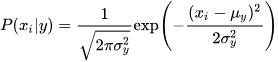

In [57]:
M = 200
sigma1 = 0.2
sigma2 = 0.4
x1 = np.random.randn(M, 1) * sigma1
y1 = np.random.randn(M, 1) * sigma2
Y1 = np.concatenate((x1, x2), axis=1)
me1 = [np.mean(x1), np.mean(y1)]
c1 = np.cov(Y1.T)
c = np.zeros(c1.shape)
for i in range(c1.shape[0]):
    c[i][i] += c1[i][i]


<a list of 5 text.Text objects>

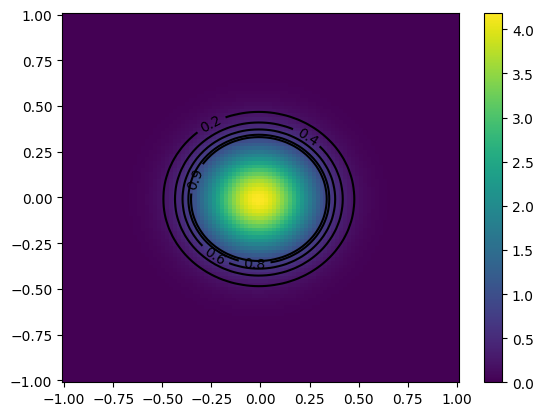

In [58]:
xx = np.linspace(-1, 1, 100)
yy = np.linspace(-1, 1, 100)
XX, YY = np.meshgrid(xx, yy)
pp = np.stack((XX.flatten(), YY.flatten()), axis=1)
m = multivariate_normal(mean=me, cov=c) #
ZZ = m.pdf(pp).reshape(XX.shape)

IMG = plt.pcolor(XX, YY, ZZ)
plt.colorbar(IMG)

CS = plt.contour(XX, YY, m.pdf(pp).reshape(XX.shape), levels=[0.2, 0.4, 0.6, 0.8, 0.9], colors='k')
plt.clabel(CS, inline=1, fontsize=10)



---



## Задача 6


In [98]:
M = 200
sigma1 = 0.2
sigma2 = 0.4
x1 = np.random.randn(M, 1) * sigma1
y1 = np.random.randn(M, 1) * sigma2
Y1 = np.concatenate((x1, x2), axis=1)

x2 = np.random.randn(M, 1) * sigma1
y2 = np.random.randn(M, 1) * sigma2
Y2 = np.concatenate((x1, x2), axis=1)


Z = np.concatenate((Y1,Y2))
nb = myNB()
nb.fit((x1,y1), (x2,y2))
n0,n1 = nb.predict(Z)

ld = myLDA()
ld.fit((x1,y1), (x2,y2))
l0,l1 = ld.predict(Z)

print(len(l0), len(l1))
print(len(n0), len(n1))


193 207
282 118


In [110]:
rn0 = [i for i in n0 for j in Y1 if all(i==j)]
rn1 = [i for i in n1 for j in Y2 if all(i==j)]
print('Точность NB',
      "\nКласс 0:", len(rn0)/len(n0),
      "\nКласс 1:",len(rn1)/len(n1),
      "\nОбщая:",len(rn0)/len(n0)* len(rn1)/len(n1))

rl0 = [i for i in l0 for j in Y1 if all(i==j)]
rl1 = [i for i in l1 for j in Y2 if all(i==j)]
print('\nТочность LDA',
      "\nКласс 0:", len(rl0)/len(l0),
      "\nКласс 1:",len(rl1)/len(l1),
      "\nОбщая:",len(rl0)/len(l0)* len(rl1)/len(l1))


Точность NB 
Класс 0: 0.475177304964539 
Класс 1: 0.4406779661016949 
Общая: 0.20940016828945787

Точность LDA 
Класс 0: 0.47668393782383417 
Класс 1: 0.4782608695652174 
Общая: 0.22797927461139894
